Importing in necessary packages and data: 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from scipy.interpolate import griddata
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Patch
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=10)        #22
rc('xtick', labelsize=8)  #15
rc('ytick', labelsize=8)  #15
rc('legend', fontsize=8)  #15
rc('text.latex', preamble=r'\usepackage{amsmath}')

w = 3.25
h = 3

In [2]:
ds = xr.open_dataset("../Data/data_2012.nc")

Plot with all buoy's starting location:

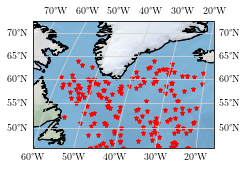

In [23]:
fig = plt.figure(figsize = (3.25, 3))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    # [-60, 0, 40, 90]

ax.coastlines(resolution='auto', color='k')
ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
ax.coastlines()
ax.stock_img()

buoy_no = np.unique(ds.data_vars['PLATFORM_NUMBER'].values)

for b in buoy_no: 
    ind = np.where(ds.data_vars['PLATFORM_NUMBER'].values == b)
    LAT = ds.data_vars['PLATFORM_NUMBER'][ind].LATITUDE.values
    LON = ds.data_vars['PLATFORM_NUMBER'][ind].LONGITUDE.values

    if -60 <= LON[0] <= -20:
        ax.plot(LON[0], LAT[0], '*', markersize=5, c='r', transform=ccrs.PlateCarree())
        #ax.annotate(b, xy=(LON[0], LAT[0]), fontsize=2, transform=ccrs.Robinson())

ax.set_extent([-60, -20, 46, 73], crs=ccrs.PlateCarree())

plt.savefig('start.png', transparent = True, dpi = 600, bbox_inches = 'tight')

In [25]:
len(buoy_no)

252

Plot with shade over region of interest:

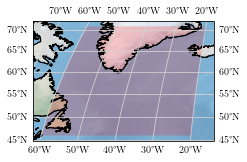

In [4]:
fig = plt.figure(figsize = (3.25, 3))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())


ax.add_patch(mpatches.Rectangle(xy=[-60, 46], width=40, height=25,
                                    facecolor='red',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree())
                 )

ax.coastlines(resolution='auto', color='k')
ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
ax.coastlines()
ax.stock_img()
plt.savefig('region.png', dpi = 600, transparent = True, bbox_inches = 'tight')

Pull Buoy no. to find buoy that traveled the furthest:

In [5]:
buoy_no = np.unique(ds.data_vars['PLATFORM_NUMBER'].values)

buoy_lon_range = {}

all_ind = []

for b in buoy_no:
    ind = np.where(ds.data_vars['PLATFORM_NUMBER'].values == b)

    if ds.LONGITUDE[ind].values[0] <= -40 and 50 <= ds.LATITUDE[ind].values[0] <= 65:
        buoy_lon_range.update({b : (ds.LONGITUDE[ind].values[-1] - ds.LONGITUDE[ind].values[0])})
        all_ind.extend(ind)

print(sorted(buoy_lon_range, key= lambda x: buoy_lon_range[x]))

[4901163, 6900965, 4901167, 6900616, 6900557, 4901200, 4901166, 4901164, 4901170, 5903397, 4901195, 5902299, 6901001, 4901681, 5903390, 4901124, 4901172, 5903393, 4901157, 5903396, 4901406, 1901210, 4901173, 5903387, 4901198, 4901153, 6900562, 4901192, 6900556, 4901193, 4901171, 1901218, 4901165, 4901127, 6901064, 6900564, 6900603, 4900801, 4901092, 4901416, 6900602, 4901202, 4901123, 5903395, 4901152, 6900604, 4901401, 4901194, 1901214, 1901215, 6900561, 5903392, 4901125, 1901217, 6900754, 6900555, 4901404, 4901142, 6900759, 4901447, 4901174, 4901143, 4901159, 4901161, 4901160, 4901168, 4901169]


Plotting Depth vs. Date Time Recorded

34


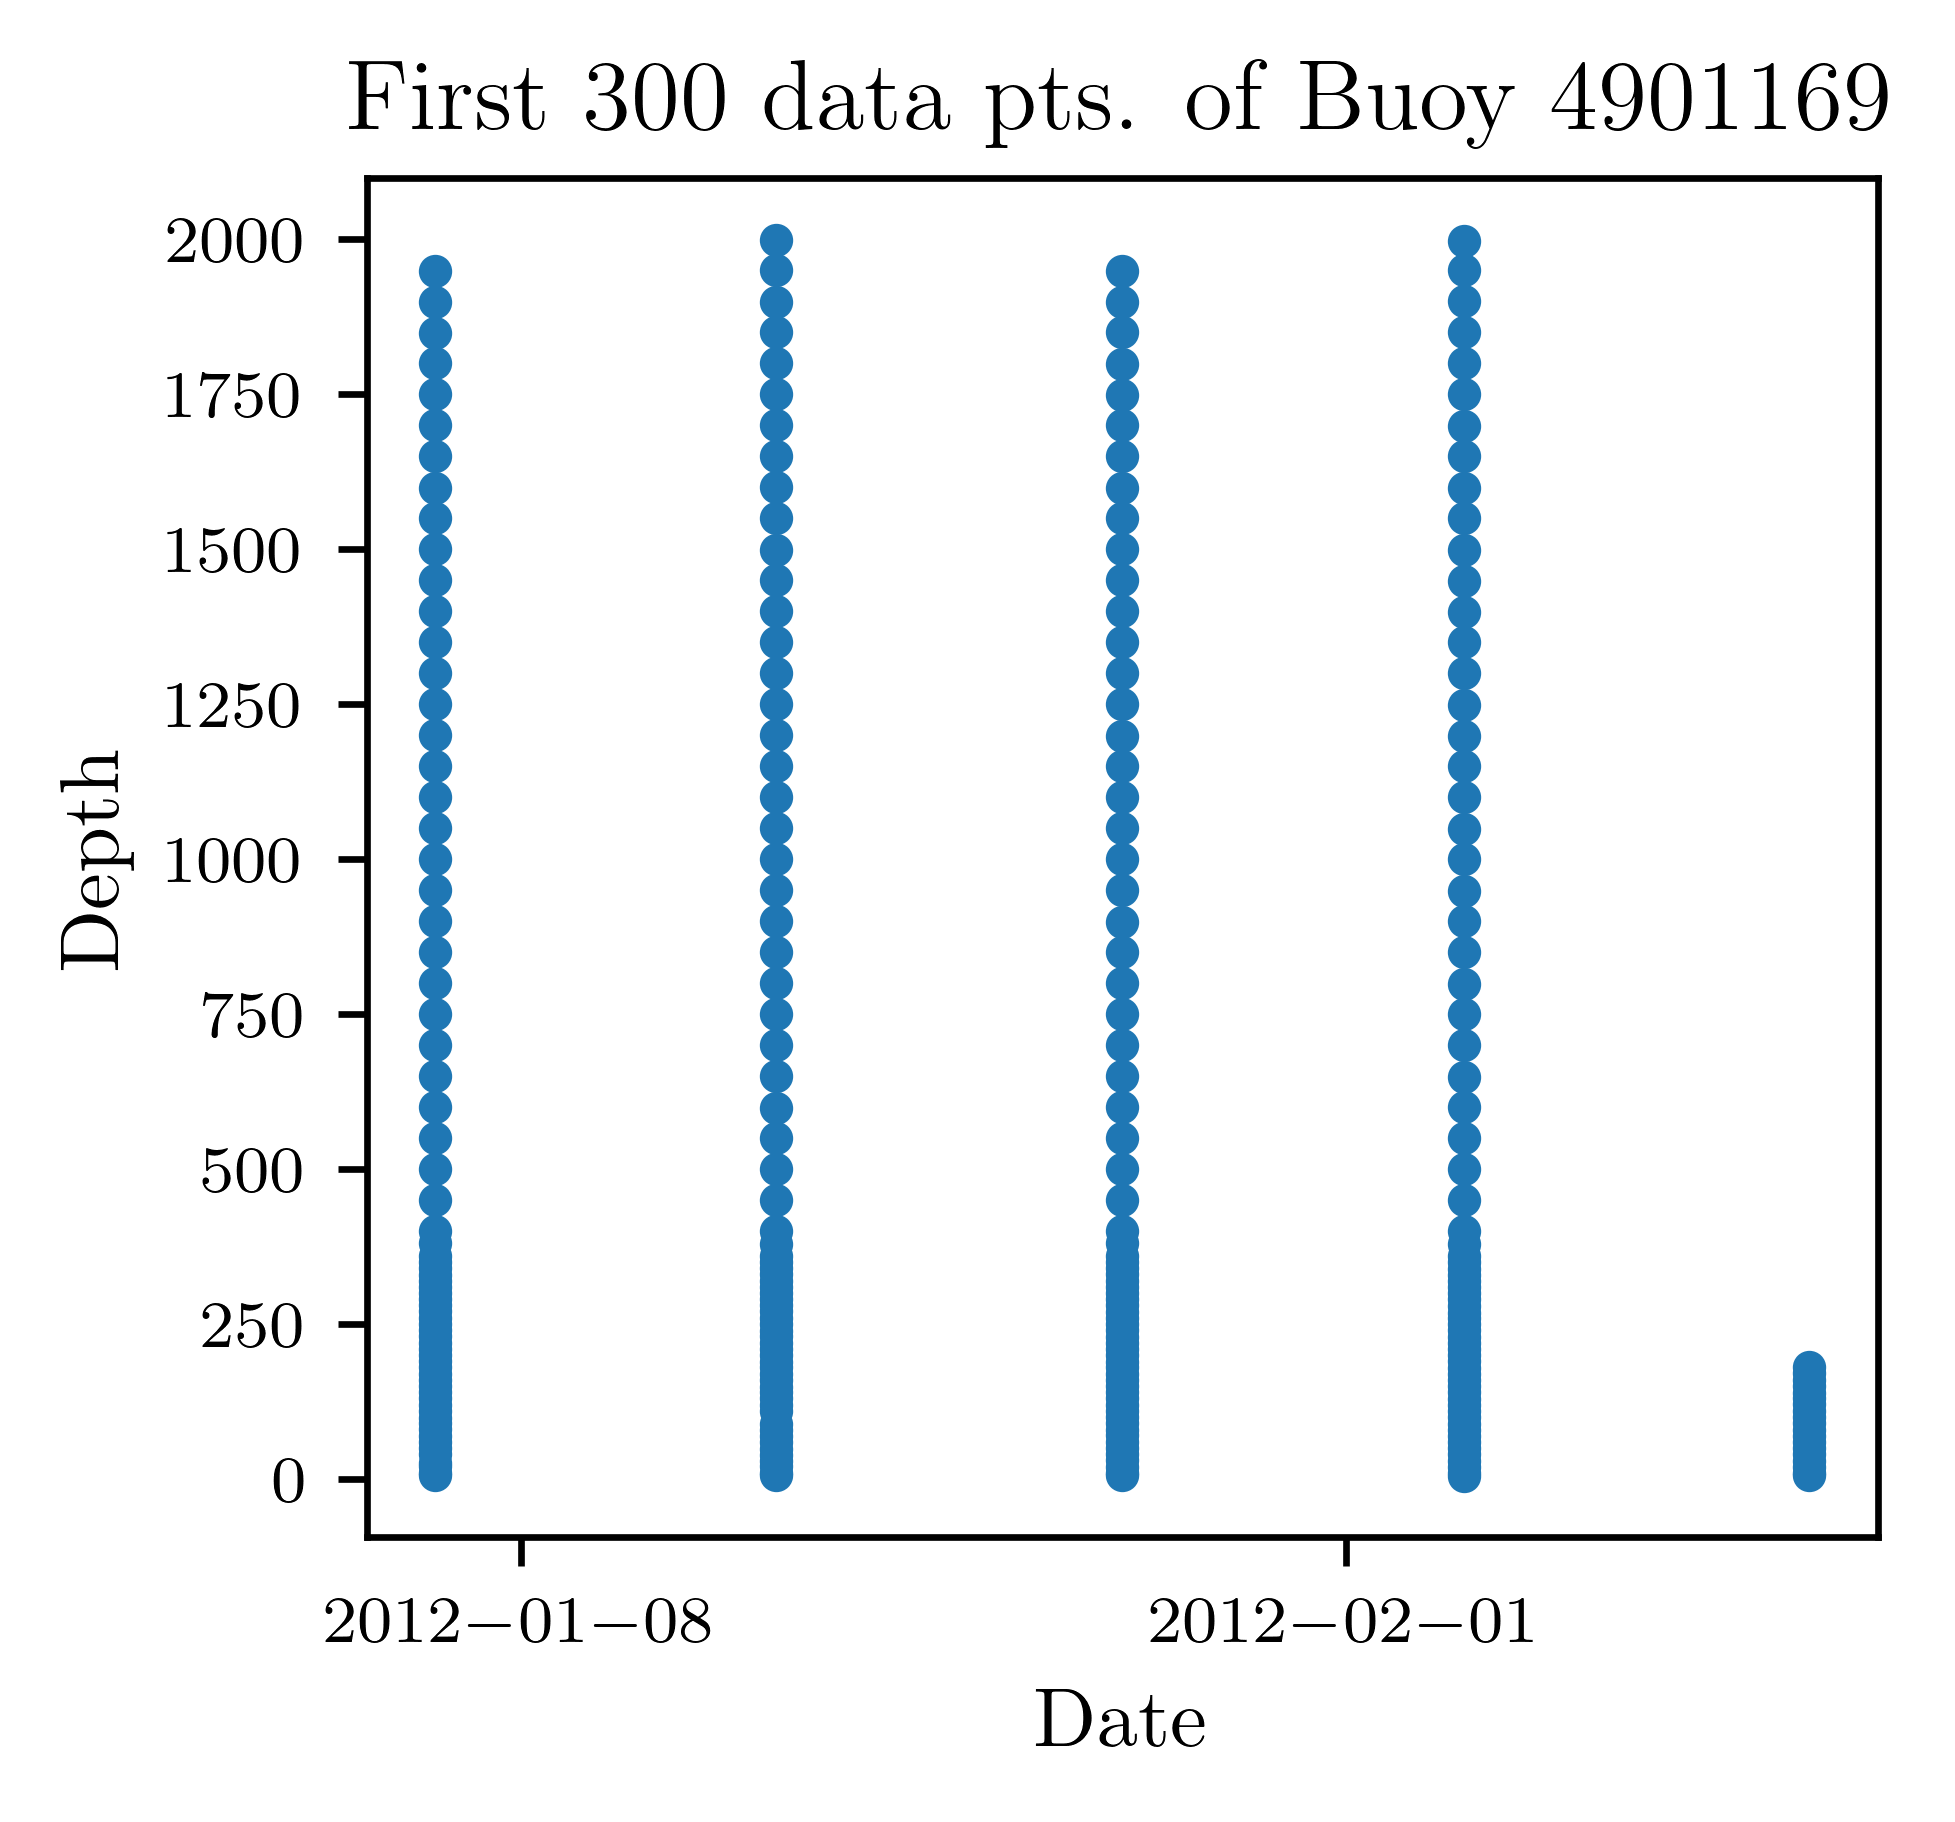

In [6]:
b = 4901169
ind = np.where(ds.data_vars['PLATFORM_NUMBER'].values == b)

dates = ds.TIME[ind]

print(len(np.unique(dates)))

plt.figure(figsize=(3.25 ,3), dpi=600)
plt.scatter(ds.TIME[ind].values[0:300], ds.data_vars['PRES'][ind].values[0:300], marker = '.')
plt.ylabel("Depth")
plt.xlabel("Date")
plt.xticks(['2012-01-08', '2012-02-01'])
plt.title("First 300 data pts. of Buoy 4901169")
plt.show()

Single Trajectory Plot:

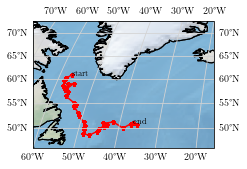

In [7]:
b = 4901169

fig = plt.figure(figsize = (3.25, 3))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_extent([-60, -20, 46, 73], crs=ccrs.PlateCarree())
    # [-60, 0, 40, 90]

ax.coastlines(resolution='auto', color='k')
ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
ax.coastlines()
ax.stock_img()

ind = np.where(ds.data_vars['PLATFORM_NUMBER'].values == b)
LAT = ds.data_vars['PLATFORM_NUMBER'][ind].LATITUDE.values
LON = ds.data_vars['PLATFORM_NUMBER'][ind].LONGITUDE.values

ax.plot(LON, LAT, '*-', markersize=5, c='r', transform=ccrs.PlateCarree())
ax.annotate('start', xy=(LON[0], LAT[0]), fontsize=8, transform=ccrs.PlateCarree())
ax.annotate('end', xy=(LON[-1], LAT[-1]), fontsize=8, transform=ccrs.PlateCarree())

plt.savefig('trajectory.png', dpi = 600, transparent = True, bbox_inches = 'tight')

3D Map of Salinity:

In [ ]:
b = 4901169
ind = np.where(ds.data_vars['PLATFORM_NUMBER'].values == b)

lon = ds.LONGITUDE[ind].values
lat = ds.LATITUDE[ind].values
depth = ds.data_vars['PRES'][ind].values
salinity = ds.data_vars['PSAL'][ind].values

fig = plt.figure(figsize=(12, 9), )
ax = fig.add_subplot(111, projection='3d')

scamap = plt.cm.ScalarMappable(cmap='inferno_r')
fcolors = scamap.to_rgba(depth)

cs = ax.plot_trisurf(lon, lat, salinity, facecolors=fcolors, cmap="inferno_r", antialiased=True)
plt.title("3D Map of Salinity from Buoy no.4901169")
ax.set_xlabel("Longitude [degrees]")
ax.set_ylabel("Latitude [degrees]")
ax.set_zlabel("Salinity [psu]")

ax.invert_zaxis()

fig.colorbar(scamap)

ax.view_init(90, -120)


3D Map of Temperature:

In [ ]:
b = 4901169
ind = np.where(ds.data_vars['PLATFORM_NUMBER'].values == b)

lon = ds.LONGITUDE[ind].values
lat = ds.LATITUDE[ind].values
depth = ds.data_vars['PRES'][ind].values
temp = ds.data_vars['TEMP'][ind].values

fig = plt.figure(figsize=(12, 9), dpi=1000)
ax = fig.add_subplot(111, projection='3d')

scamap = plt.cm.ScalarMappable(cmap='viridis_r')
fcolors = scamap.to_rgba(depth)

cs = ax.plot_trisurf(lon, lat, temp, facecolors=fcolors, cmap="viridis_r", antialiased=True)
plt.title("3D Map of Temperature from Buoy no.4901169")
ax.set_xlabel("Longitude [degrees]")
ax.set_ylabel("Latitude [degrees]")
ax.set_zlabel("Temperature [C]")

#ax.invert_zaxis()

fig.colorbar(scamap)

ax.view_init(20, -120)

Vertical Salinity Section for Buoy (not included in presentation):

In [ ]:
pts = ds.data_vars['PLATFORM_NUMBER'][ind].N_POINTS

TIME=ds.TIME.values[pts]
PSAL=ds.data_vars['PSAL'].values[pts]
PRES=ds.data_vars['PRES'].values[pts]
PRES_IDX=np.arange(5,2005,2000/np.shape(pts)[0])

PSALI= np.zeros((TIME.shape[0],PRES_IDX.shape[0]))
PSALI.fill(np.nan)

for ip in range(0,PRES.shape[0]-1):
    PSALI[ip,:]=np.interp(PRES_IDX[ip],PRES,PSAL)

fig, ax = plt.subplots(figsize=(3.25, 3))

cs=ax.contourf(TIME,PRES_IDX,PSALI,100, cmap="inferno_r")

ax.invert_yaxis()

ax.set_title(f"Vertical Salinity Section for Buoy {b}")
ax.set_xlabel("Date")
ax.set_ylabel(f"{ds.data_vars['PRES'].long_name}")

cbar=fig.colorbar(cs,ax=ax)

plt.show()

Salinity Contour Plot from Multiple Buoys:

In [ ]:
fig = plt.figure(figsize = (3.25, 3))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=0))

gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)

gl.top_labels = False
gl.right_labels = False

ax.set_extent([-60, -20, 46, 73], crs=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

plt.title(f"Salinity Contour from buoys")

buoy_nos = [4901169, 6901061, 6900603, 6900759, 6900755, 6900564, 1901215, 5903392]
for buoy in buoy_nos:
    ind = np.where(ds.data_vars['PLATFORM_NUMBER'].values == buoy)

    LON = ds.LONGITUDE[ind].values
    LAT = ds.LATITUDE[ind].values

    PSAL = ds.data_vars['PSAL'].values[ind]

    X,Y = np.meshgrid(LON,LAT)
    Z  = griddata((LON, LAT), PSAL, (X,Y), method='cubic')

    ax.contourf(X,Y,Z, transform=ccrs.PlateCarree(), cmap='jet')

scamap = plt.cm.ScalarMappable(cmap='jet')
fcolors = scamap.to_rgba(PSAL)

fig.colorbar(scamap)

plt.show()

Salinity Contour Plot from Single Buoys:

In [ ]:
fig = plt.figure(dpi=1000)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=0))

gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)

gl.top_labels = False
gl.right_labels = False

ax.set_extent([-60, -20, 46, 73], crs=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

plt.title(f"Salinity Contour from buoy{b}")

LON = ds.LONGITUDE[ind].values
LAT = ds.LATITUDE[ind].values

PSAL = ds.data_vars['PSAL'].values[ind]

X,Y = np.meshgrid(LON,LAT)
Z  = griddata((LON, LAT), PSAL, (X,Y), method='cubic')

ax.contourf(X,Y,Z, transform=ccrs.PlateCarree(), cmap='jet')

scamap = plt.cm.ScalarMappable(cmap='jet')
fcolors = scamap.to_rgba(PSAL)

fig.colorbar(scamap)

plt.show()

Temperature Contour Plot from Single Buoys:

In [ ]:
temp = ds.data_vars['TEMP'][ind].values

X,Y = np.meshgrid(LON,LAT)
Z  = griddata((LON, LAT), temp, (X,Y), method='cubic')


fig = plt.figure(dpi=1000)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=0))


gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)

gl.top_labels = False
gl.right_labels = False

ax.set_extent([-60, -20, 46, 73], crs=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()


cs1=ax.contourf(X,Y,Z, transform=ccrs.PlateCarree(), cmap='jet')
plt.title(f"Temperature Contour from buoy no.{b}")


scamap = plt.cm.ScalarMappable(cmap='jet')
fcolors = scamap.to_rgba(temp)

fig.colorbar(scamap)
plt.show()

# Using Pandas

In [41]:
data = ds.to_dataframe()

In [47]:
len(np.unique(data[data['PLATFORM_NUMBER'] == 4901169]['CYCLE_NUMBER']))

34

In [9]:
# Look at delayed mode data with quality control.
idx = (data['DATA_MODE'] == 'D')
data = data[idx]
data = data.reset_index(drop = True)
data = data[['PLATFORM_NUMBER', 'LONGITUDE', 'LATITUDE', 'POSITION_QC', 'TIME', 
             'TIME_QC', 'TEMP', 'TEMP_QC', 'PSAL', 'PSAL_QC', 'PRES', 'PRES_QC']]
data = data.rename(columns = {'PLATFORM_NUMBER': 'id', 'TIME': 'time', 'LONGITUDE': 'lon', 'LATITUDE': 'lat',
                              'TEMP': 'tmp', 'PSAL': 'sal', 'PRES': 'prs'})

In [32]:
data['id'].value_counts().mean()

2767.8227848101264

In [37]:
data[data['id'] == 4901169]

,id,lon,lat,POSITION_QC,time,TIME_QC,tmp,TEMP_QC,sal,PSAL_QC,prs,PRES_QC
7524,4901169,-56.810001,60.791000,1,2012-01-05 11:50:00,1,0.794,1,33.953880,1,6.500000,1
7525,4901169,-56.810001,60.791000,1,2012-01-05 11:50:00,1,0.792,1,33.954880,1,10.300000,1
7526,4901169,-56.810001,60.791000,1,2012-01-05 11:50:00,1,0.791,1,33.954891,1,20.600000,1
7527,4901169,-56.810001,60.791000,1,2012-01-05 11:50:00,1,0.792,1,33.954880,1,26.700001,1
7528,4901169,-56.810001,60.791000,1,2012-01-05 11:50:00,1,0.791,1,33.954891,1,40.799999,1
...,...,...,...,...,...,...,...,...,...,...,...,...
655141,4901169,-36.643002,50.856998,1,2012-11-30 11:56:00,1,3.707,1,34.920052,1,1750.199951,1
655142,4901169,-36.643002,50.856998,1,2012-11-30 11:56:00,1,3.666,1,34.920052,1,1800.300049,1
655143,4901169,-36.643002,50.856998,1,2012-11-30 11:56:00,1,3.632,1,34.919041,1,1850.099976,1
655144,4901169,-36.643002,50.856998,1,2012-11-30 11:56:00,1,3.602,1,34.919041,1,1899.800049,1


In [40]:
len(np.unique(data[data['id'] == 4901169]['time']))

34

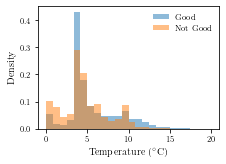

In [26]:
plt.figure(figsize = (3.25, 2.25))
bins = np.linspace(0, 20, 25)
plt.hist(data[data['TEMP_QC'] == 1]['tmp'], bins = bins, density = True, 
         alpha = 0.5, label = 'Good')
plt.hist(data[data['TEMP_QC'] != 1]['tmp'], bins = bins, density = True, 
         alpha = 0.5, label = 'Not Good')
plt.xlabel(r'Temperature ($^\circ$C)')
plt.ylabel(r'Density')
plt.legend(frameon = False)
plt.savefig('tmp.png', dpi = 600, transparent = True, bbox_inches = 'tight')

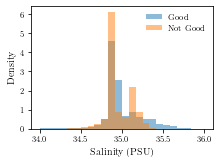

In [27]:
plt.figure(figsize = (3.25, 2.25))
bins = np.linspace(34, 36, 25)
plt.hist(data[data['PSAL_QC'] == 1]['sal'], bins = bins, density = True, 
         alpha = 0.5, label = 'Good')
plt.hist(data[data['PSAL_QC'] != 1]['sal'], bins = bins, density = True, 
         alpha = 0.5, label = 'Not Good')
plt.xlabel('Salinity (PSU)')
plt.ylabel(r'Density')
plt.legend(frameon = False)
plt.savefig('sal.png', dpi = 600, transparent = True, bbox_inches = 'tight')

In [20]:
np.unique(data['TIME_QC'])

array([1])

In [42]:
np.mean(data['POSITION_QC'] == 1), np.mean(data['PRES_QC'] == 1), np.mean(data['PSAL_QC'] == 1), np.mean(data['TEMP_QC'] == 1)

(0.998184379258934, 0.9710765975480735, 0.9841243707829883, 0.9874232820203239)

In [43]:
data.shape

(655974, 12)

In [45]:
np.mean((data['POSITION_QC'] == 1) & \
      (data['PRES_QC'] == 1) & (data['PSAL_QC'] == 1) & (data['TEMP_QC'] == 1))

0.9655367438343593

In [ ]:
# Look at delayed mode data with quality control.
idx = (data['DATA_MODE'] == 'D') & (data['POSITION_QC'] == 1) & \
      (data['PRES_QC'] == 1) & (data['PSAL_QC'] == 1) & (data['TEMP_QC'] == 1)
data = data[idx]
data = data.reset_index(drop = True)
data = data[['PLATFORM_NUMBER', 'LONGITUDE', 'LATITUDE', 'TIME', 'TEMP', 'PSAL', 'PRES']]
data = data.rename(columns = {'PLATFORM_NUMBER': 'id', 'TIME': 'time', 'LONGITUDE': 'lon', 'LATITUDE': 'lat',
                              'TEMP': 'tmp', 'PSAL': 'sal', 'PRES': 'prs'})